# Explanation of features and numberical representation of categorical features



There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

Below is the response regarding the values used for fields X6:X11

"This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default"
what does default in next month mean?

it means the client will not pay next month
- predictproba_
- plot roc curve



In [2]:
pay_dict= {}
import random
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
print(os.listdir())
seedy = random.seed(42)

['.ipynb_checkpoints', 'Balance_Limits.png', 'BSpiegel_Credit_Card_Data_Exploration-checkpoint-Copy1.ipynb', 'BSpiegel_Credit_Card_Data_Exploration-checkpoint.ipynb', 'completed credit card project.docx', 'Credit_default_9.9.19', 'Credit_default_with_output.ipynb', 'education_bar.png', 'PAY_0_bar.png', 'Percentagew_Limits.png', 'Percentage_L.png', 'Percentage_Lim.png', 'Percentage_Limit.png', 'Percentage_Limits.png', 'Percentage_Limits_wed.png', 'Percentage_LL.png', 'Percentage_LL2.png', 'Percent_Limit_Used.png', 'ROC_Curve.png', 'Total_Bills.png', 'UCI_Credit_Card.csv', 'Untitled.ipynb', '~$mpleted credit card project.docx']


In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df['PERCENT_LIMIT'] = df['BILL_AMT1']/df['LIMIT_BAL'] 
df['PERCENT_LIMIT'] = round(df['PERCENT_LIMIT'],2)
df['PERCENT_PAY'] = df['PAY_AMT1']/df['LIMIT_BAL'] 
df['PERCENT_PAY'] = round(df['PERCENT_PAY'],2)
print(df.columns)
df2 = df.copy()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PERCENT_LIMIT', 'PERCENT_PAY'],
      dtype='object')


In [4]:
df.BILL_AMT1.sum()
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PERCENT_LIMIT,PERCENT_PAY
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.423700,0.045023
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.411554,0.100287
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-0.620000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.020000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.310000,0.020000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.830000,0.050000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,6.460000,2.600000


In [5]:
paydf = df.loc[:,['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

lister = []
for row in np.array(paydf):
    value = np.any(row>0, axis = 0) 
    lister.append(value)
paydf['never_default']=lister

df2['ever_default'] = paydf['never_default'].astype('int')



In [5]:
df_BILL_PAY = df.loc[:,['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1',  'PAY_AMT2',  'PAY_AMT3',  'PAY_AMT4',  'PAY_AMT5',  'PAY_AMT6']]


In [6]:
df2['Limit_history'] = df2.PERCENT_LIMIT*df2.ever_default
df2['Total_PAY_AMT']= (df2.PAY_AMT1 + df2.PAY_AMT2 + df2.PAY_AMT3 + df2.PAY_AMT4 + df2.PAY_AMT5)
df2['total_months_behind'] = (df2.PAY_0 + df2.PAY_2 + df2.PAY_3 + df2.PAY_4 + df2.PAY_5 + df2.PAY_6)
df2['Total_Bill_AMT'] = (df2.BILL_AMT2 + df2.BILL_AMT3 + df2.BILL_AMT4 + df2.BILL_AMT5 + df2.BILL_AMT6)


In [7]:
paydict = {-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9}
df5 = df.copy()
df5.PAY_0 = df5.PAY_0.map(paydict)
df5.PAY_2 = df5.PAY_2.map(paydict)
df5.PAY_3 = df5.PAY_3.map(paydict)
df5.PAY_4 = df5.PAY_4.map(paydict)
df5.PAY_5 = df5.PAY_5.map(paydict)
df5.PAY_6 = df5.PAY_6.map(paydict)
df5[:20]
df5['aggregate_default'] = df5.PAY_0 + df5.PAY_2 + df5.PAY_3 + df5.PAY_4 + df5.PAY_5 + df5.PAY_6
df2['aggregate_default'] = df5['aggregate_default']

In [8]:
paydict2 = {-2:0,-1:0,0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}
df6 = df.copy()
df6.PAY_0 = df6.PAY_0.map(paydict2)
df6.PAY_2 = df6.PAY_2.map(paydict2)
df6.PAY_3 = df6.PAY_3.map(paydict2)
df6.PAY_4 = df6.PAY_4.map(paydict2)
df6.PAY_5 = df6.PAY_5.map(paydict2)
df6.PAY_6 = df6.PAY_6.map(paydict2)
df2['aggregate_default_simple'] = df6.PAY_0 + df6.PAY_2 + df6.PAY_3 + df6.PAY_4 + df6.PAY_5 + df6.PAY_6


# Feature Creation 

In trying to get the best predictive results from my model, I worked with feature creation. Knowing that many of the features have relationships I attempted to create numerical representation of the relationships. In some instance features on their own may not be highly predictive but the interaction may be.  

I created 'aggregate_default_simple' so that I could create an sum of all the months an individual defaulted during the 6 months stracked. I created pay paydict2 above to modify the numbers in PAY_0 to PAY_6 creating what i thought would be a better representation. I wanted an aggregate of the total months that a person has defaulted in the months tracked. The negative in the columns Pay_0 to Pay_6 numbers tells if a person has paid off there card in full (-1) or didn't use there credit card at all (-2). So in an instance that an individual didn't use their card at all to begin with, it's summation with two months of default would negate the defaults. This would decrease the correlation of the given feature with an individuals default history. Similarly in the rows PAY_0 throuh PAY:6, when a number is higher than 1 it tells how many months in a row an individual has defaulted. In creating a sum of how many months have been defaulted, each row is describing all the months on record, rows which are already being described. If I do not remap the original positive numbers an individual who defaults 3 month in row people would be represented with a value of 6 ( 1 (month 1) + 2 (month 2) +3 (month). Just to see if there was any value from not changing the positive numbers, if defaulting many times in a row was predictive I also created 'aggregate_default' the only difference with the earlier feature being that i did not remap all positive values to be 1. 

The respective feature importance of aggregate_default_simple' and 'aggregate default' were 0.13718832, 0.01436583 results, demonstrating that remapping all positives values to 1 gave more predictive values. 


In [9]:
df2['default_last_month'] = df['default.payment.next.month']

for name in enumerate(df2.columns):
    print(name)

(0, 'ID')
(1, 'LIMIT_BAL')
(2, 'SEX')
(3, 'EDUCATION')
(4, 'MARRIAGE')
(5, 'AGE')
(6, 'PAY_0')
(7, 'PAY_2')
(8, 'PAY_3')
(9, 'PAY_4')
(10, 'PAY_5')
(11, 'PAY_6')
(12, 'BILL_AMT1')
(13, 'BILL_AMT2')
(14, 'BILL_AMT3')
(15, 'BILL_AMT4')
(16, 'BILL_AMT5')
(17, 'BILL_AMT6')
(18, 'PAY_AMT1')
(19, 'PAY_AMT2')
(20, 'PAY_AMT3')
(21, 'PAY_AMT4')
(22, 'PAY_AMT5')
(23, 'PAY_AMT6')
(24, 'default.payment.next.month')
(25, 'PERCENT_LIMIT')
(26, 'PERCENT_PAY')
(27, 'ever_default')
(28, 'Limit_history')
(29, 'Total_PAY_AMT')
(30, 'total_months_behind')
(31, 'Total_Bill_AMT')
(32, 'aggregate_default')
(33, 'aggregate_default_simple')
(34, 'default_last_month')


In [10]:
df12 = df2.copy()
df12 = df12[df12['Total_Bill_AMT']<1937788.6]
df12 = df12[df12['PERCENT_LIMIT']>0.0]

Total_bill_bins = pd.cut(df12['Total_Bill_AMT'], bins = 5)
df12['T_Bills'] = Total_bill_bins
Total_bill_bins.value_counts()



(-153040.795, 266606.0]    17820
(266606.0, 684165.0]        5208
(684165.0, 1101724.0]       1697
(1101724.0, 1519283.0]       471
(1519283.0, 1936842.0]       173
Name: Total_Bill_AMT, dtype: int64

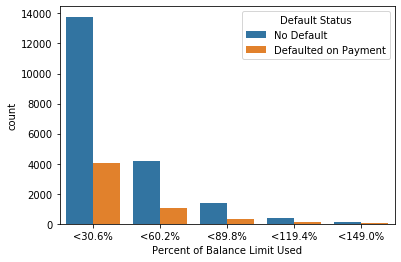

In [11]:
sns.countplot(Total_bill_bins,  hue = df12['default_last_month'])
plt.xticks(ticks = np.arange(5), labels = ['<30.6%', '<60.2%','<89.8%', '<119.4%', '<149.0%'] )
plt.xlabel('Percent of Balance Limit Used')
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])
plt.savefig('Total_Bills.png')


In [58]:
df_Tot_bns = df12.groupby(['T_Bills'])
df_Tot_bns.default_last_month.value_counts(normalize=True)


T_Bills                  default_last_month
(-153040.795, 266606.0]  0                     0.773288
                         1                     0.226712
(266606.0, 684165.0]     0                     0.797427
                         1                     0.202573
(684165.0, 1101724.0]    0                     0.802004
                         1                     0.197996
(1101724.0, 1519283.0]   0                     0.774947
                         1                     0.225053
(1519283.0, 1936842.0]   0                     0.751445
                         1                     0.248555
Name: default_last_month, dtype: float64

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PERCENT_LIMIT', 'PERCENT_PAY',
       'ever_default', 'Limit_history', 'Total_PAY_AMT', 'total_months_behind',
       'Total_Bill_AMT', 'aggregate_default', 'aggregate_default_simple',
       'default_last_month'],
      dtype='object')


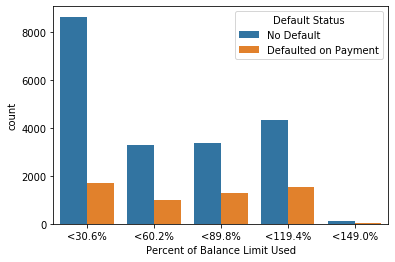

In [13]:
df11 = df2.copy()
df11 = df11[df11['PERCENT_LIMIT']<1.5]
df11 = df11[df11['PERCENT_LIMIT']>0.0]
print(df11.columns)
df11.PERCENT_LIMIT.head()
percent_limit_bins = pd.cut(df11['PERCENT_LIMIT'], bins = 5)
df11['percent_limit_bins'] = percent_limit_bins
percent_limit_bins.unique()
plt.clf()

sns.countplot(percent_limit_bins,  hue = df11['default_last_month'])
plt.xticks(ticks = np.arange(5), labels = ['<30.6%', '<60.2%','<89.8%', '<119.4%', '<149.0%'] )
plt.xlabel('Percent of Balance Limit Used')
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])
plt.savefig('Percentage_LL2.png')


In [14]:
df_pct_bns = df11.groupby(['percent_limit_bins'])
df_pct_bns.default_last_month.value_counts(normalize = True)


percent_limit_bins  default_last_month
(0.00852, 0.306]    0                     0.835688
                    1                     0.164312
(0.306, 0.602]      0                     0.768622
                    1                     0.231378
(0.602, 0.898]      0                     0.722604
                    1                     0.277396
(0.898, 1.194]      0                     0.737716
                    1                     0.262284
(1.194, 1.49]       0                     0.684524
                    1                     0.315476
Name: default_last_month, dtype: float64

In [15]:
df2 = df2.drop('default.payment.next.month', axis = 1)


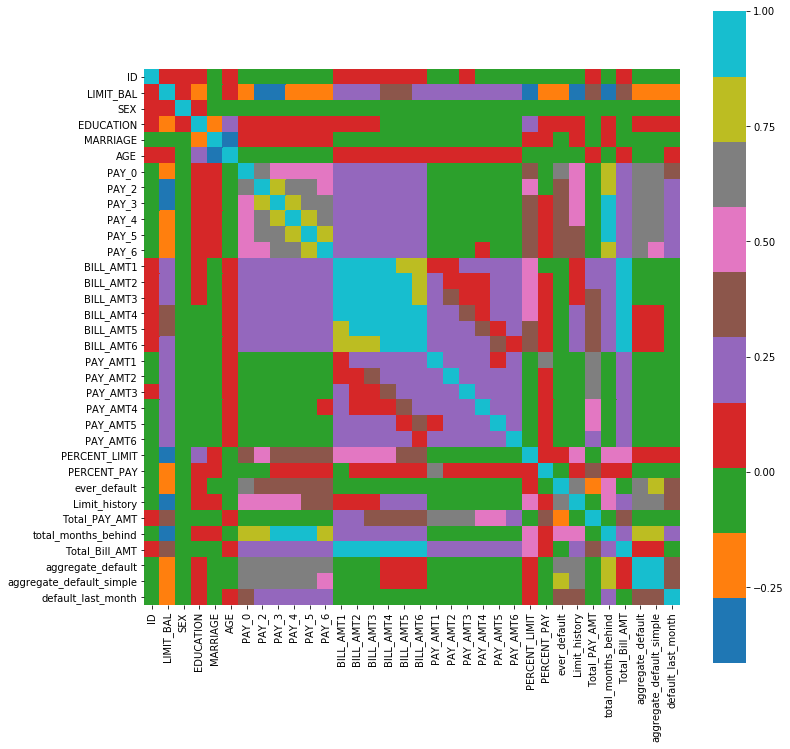

In [16]:

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(df2.corr(), square=True, cmap="tab10")
plt.show()

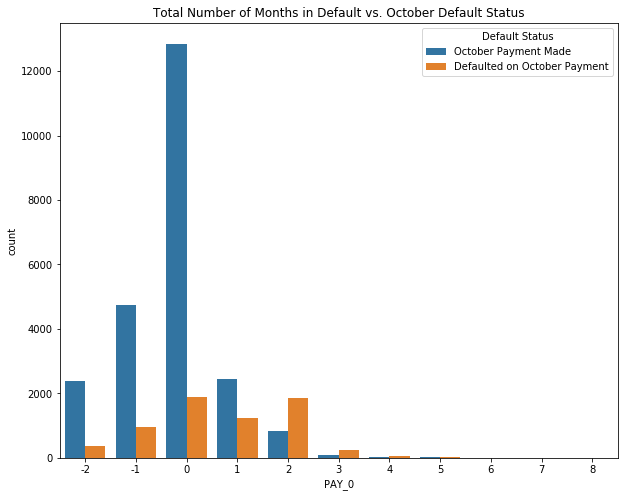

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
g = sns.countplot(x = 'PAY_0', hue = 'default_last_month', data=df2)
plt.legend(title='Default Status', loc='upper right', labels=['October Payment Made', 'Defaulted on October Payment'])
plt.title('Total Number of Months in Default vs. October Default Status')
fig.savefig('PAY_0_bar.png')
plt.show()

The most important feature in predicting whether an an individual would default in the coming month was there default status in the month before. Looking at the histogram showing the relationship it is very clear that individuals that defaulted the month prior were much higher risk in the coming month. While a person who had a one month delay was at much higher risk than people who had not defaulted, individual who had delayed payment for over one month were at an even higher risk of defaulting in the next month. Similarly in the chart below, which aggregates all months of default, with every month an individual defaulted they are at a higher risk of defaulting in the predicted month.

In [4]:
import seaborn as sns
sns.set_size_inches(10, 8)
sns.countplot(x = 'aggregate_default_simple', hue = 'default_last_month', data=df2)
plt.title('Final Default Status by Prior Months Defaulted  ')
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'set_size_inches'

In [3]:
df4 = df2.copy()
pay_dict =  {-2:0, -1:0, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}
df4['PAY_0'] = df2.PAY_0.map(pay_dict)

df4['PAY_2'] = df2.PAY_2.map(pay_dict)

df4['PAY_3'] = df2.PAY_3.map(pay_dict)

df4['PAY_4'] = df2.PAY_4.map(pay_dict)
df4['PAY_5'] = df2.PAY_5.map(pay_dict)
df4['PAY_6'] = df2.PAY_6.map(pay_dict)
df2['total_months_behind'] = (df2.PAY_0 + df2.PAY_2 + df2.PAY_3 + df2.PAY_4 + df2.PAY_5 + df2.PAY_6) /6



NameError: name 'df2' is not defined

In the cell above you can see that I am mapping several values with a dictionary. The dictionary is specifically substituting values of 0 for any negative values. This is appropriate because of the new features I have created. all the cells being mapped for this process represent how many months behind a credit user is. However when the negative numbers represent something else entirely. -2 means that no credit was used at all and -1  shows that a credit card was paid off in full. When looking to see how may months behind a person has been in aggregate, using those negative numbers will cancel out the values of months when there were defaults because a person hasn't used there credit or paid it off fully. 

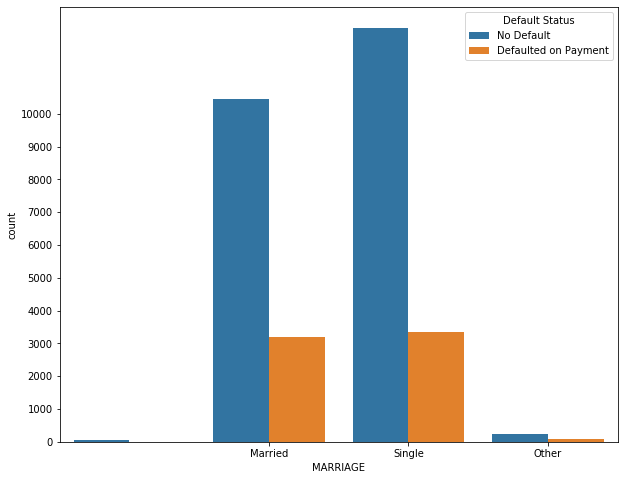

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'MARRIAGE', hue = 'default_last_month', data=df2)
plt.xticks([ 1, 2,3], ['Married', 'Single', 'Other'])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])

plt.show()


In [22]:
df2.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [60]:
df2['default_last_month'].value_counts(normalize = True)


0    0.7788
1    0.2212
Name: default_last_month, dtype: float64

In [23]:
df_marriage = df2.groupby(['MARRIAGE'])
df_marriage.default_last_month.value_counts(normalize=True)

MARRIAGE  default_last_month
0         0                     0.907407
          1                     0.092593
1         0                     0.765283
          1                     0.234717
2         0                     0.790717
          1                     0.209283
3         0                     0.739938
          1                     0.260062
Name: default_last_month, dtype: float64

In [59]:
print(type(df_marriage))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


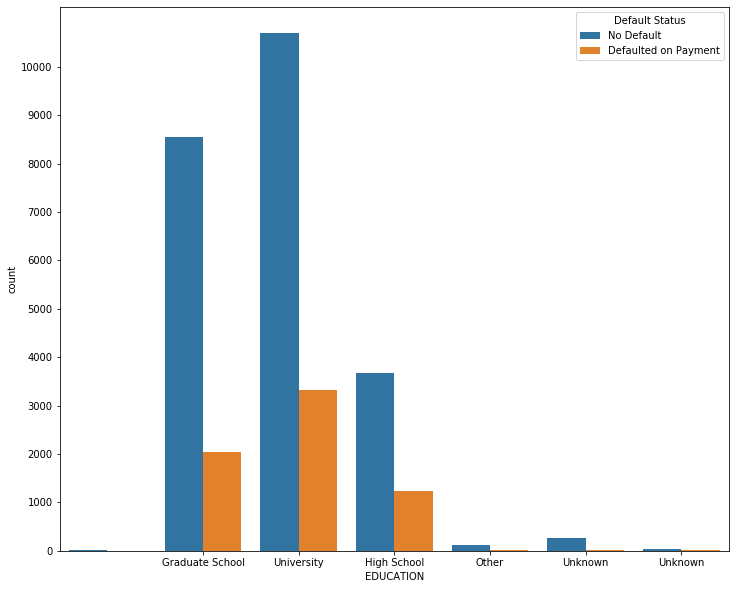

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.countplot(x ='EDUCATION', hue = 'default_last_month', data=df2)
plt.xticks([ 1, 2,3,  4, 5, 6], ['Graduate School', 'University', 'High School',  'Other', 'Unknown', 'Unknown'])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])

fig.savefig('education_bar.png')

plt.show()

In [25]:
df_edu = df2.groupby(['EDUCATION'])
print(df_edu)
df_edu.default_last_month.value_counts(normalize=True)

EDUCATION  default_last_month
0          0                     1.000000
1          0                     0.807652
           1                     0.192348
2          0                     0.762651
           1                     0.237349
3          0                     0.748424
           1                     0.251576
4          0                     0.943089
           1                     0.056911
5          0                     0.935714
           1                     0.064286
6          0                     0.843137
           1                     0.156863
Name: default_last_month, dtype: float64

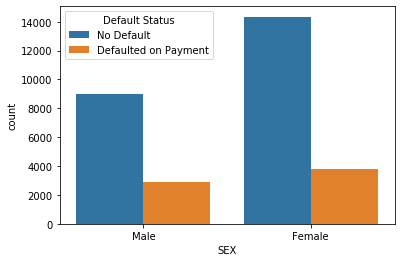

In [26]:
sns.countplot('SEX', hue = 'default_last_month' , data = df2)
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])

plt.show()



In [27]:
df_gender = df2.groupby(['SEX'])
df_gender.default_last_month.value_counts(normalize=True)

SEX  default_last_month
1    0                     0.758328
     1                     0.241672
2    0                     0.792237
     1                     0.207763
Name: default_last_month, dtype: float64

Below I create the X dataframe and the y label which I will then use with scikit learn models. Before doing so I use pandas 'dropna' function on the dataframe because scikit learn can not run with nan values. 


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df2=df2.dropna()                         
X= df2.drop(['default_last_month','ID'], axis = 1)
y= df2['default_last_month'] 
df2 = df2.apply(pd.to_numeric, errors='ignore')


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=21)


Below I run scikit-learn's KNeighborsClassifier algorithm. The model perform's very poorly and providing no justification for further testing or hyperparameterization with the model

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = .15,  random_state = 25)

knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'score:{knn.score(X_test, y_test)}')
3454

[[3341  155]
 [ 891  113]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      3496
           1       0.42      0.11      0.18      1004

    accuracy                           0.77      4500
   macro avg       0.61      0.53      0.52      4500
weighted avg       0.71      0.77      0.71      4500

score:0.7675555555555555


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestClassifier


Below I run GridSearchCV on the random forest classifier to find the best hyperparameters for the random forest algorithm. 

In [47]:

import numpy as np
max_features = [6, 8, 13, 21, 27]
num_estimators = [ 100, 200]
depth = [7,8, 9, 11] 
parameters = {'n_estimators':num_estimators, 'max_depth': depth, 'max_features' : max_features}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
b_estimator = clf.best_estimator_
print(b_estimator)

{'max_depth': 9, 'max_features': 6, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = seedy)
rf = RandomForestClassifier(n_estimators = 200, max_depth = 9, max_features = 6)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_proba)

0.819
[[4440  207]
 [ 879  474]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4647
           1       0.70      0.35      0.47      1353

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[0.94730524 0.05269476]
 [0.91078577 0.08921423]
 [0.90662841 0.09337159]
 ...
 [0.91479366 0.08520634]
 [0.93348756 0.06651244]
 [0.84934284 0.15065716]]


In [33]:
rf.feature_importances_


array([0.02154459, 0.00218185, 0.00582123, 0.00333135, 0.02020504,
       0.17919273, 0.03552472, 0.01890159, 0.01465442, 0.01153715,
       0.00791037, 0.02577765, 0.02064975, 0.01824161, 0.0179155 ,
       0.01894829, 0.01708007, 0.01944107, 0.01660865, 0.01829547,
       0.01601343, 0.01393797, 0.01622402, 0.02226437, 0.01065866,
       0.04493078, 0.06120032, 0.03127362, 0.1049929 , 0.02312401,
       0.09284128, 0.06877557])

In [34]:
print(y_test.shape)
print(y_proba.shape)

(6000,)
(6000, 2)


In [35]:
df2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PERCENT_LIMIT', 'PERCENT_PAY', 'ever_default', 'Limit_history',
       'Total_PAY_AMT', 'total_months_behind', 'Total_Bill_AMT',
       'aggregate_default', 'aggregate_default_simple', 'default_last_month'],
      dtype='object')

# Feature Importances

In the above cell we can see which features played the largest role in making predictions. The biggest predictors, in order of importance were:
 PAY_O, aggregate_default_simple, Total_Bill_AMT, Total_PAY_AMT, ever_default, and percent_limit. Interestingly besides PAY_0 all of these features were ones that I created by combining and comparing multiple original features.


In [38]:
from sklearn.metrics import roc_auc_score
y_score = y_proba[:,1]
roc_auc_score(y_test, y_score)

0.7965531330881124

In [39]:
y_test = np.asarray(y_test)
#print(y_true[:,1])
print(type(y_test))
print(y_test)
y_test.shape

<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]


(6000,)

In [40]:

y_proba_1 = y_proba[:,1]
print(y_proba_1)

[0.05269476 0.08921423 0.09337159 ... 0.08520634 0.06651244 0.15065716]


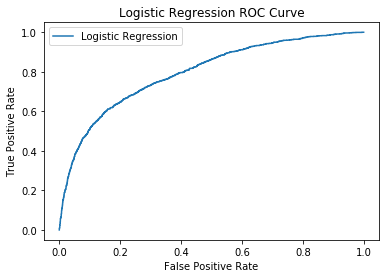

In [41]:
from sklearn.metrics import roc_curve

f_positive_r, t_positive_r, thresholds = roc_curve(y_test, y_proba_1)
plt.plot(f_positive_r, t_positive_r)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend( labels = ['Logistic Regression'])
plt.savefig('ROC_Curve.png')
plt.show()

In [56]:
df11 = df2.copy()
df11 = df11[df11['PERCENT_LIMIT']<1.5]
df11 = df11[df11['PERCENT_LIMIT']>0.0]
print(df11.columns)
df11.PERCENT_LIMIT.head()
percent_limit_bins = pd.cut(df11['PERCENT_LIMIT'], bins = 5)
print(percent_limit_bins)
percent_limit_bins.unique()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PERCENT_LIMIT', 'PERCENT_PAY', 'ever_default', 'Limit_history',
       'Total_PAY_AMT', 'total_months_behind', 'Total_Bill_AMT',
       'aggregate_default', 'aggregate_default_simple', 'default_last_month'],
      dtype='object')
0        (0.00852, 0.306]
1        (0.00852, 0.306]
2          (0.306, 0.602]
3          (0.898, 1.194]
4        (0.00852, 0.306]
5           (1.194, 1.49]
6          (0.602, 0.898]
7        (0.00852, 0.306]
8        (0.00852, 0.306]
10       (0.00852, 0.306]
11       (0.00852, 0.306]
12       (0.00852, 0.306]
13         (0.898, 1.194]
14       (0.00852, 0.306]
15         (0.898, 1.194]
16         (0.602, 0.898]
17         (0.602, 0.898]
20       (0.00852, 0.306]
22  

[(0.00852, 0.306], (0.306, 0.602], (0.898, 1.194], (1.194, 1.49], (0.602, 0.898]]
Categories (5, interval[float64]): [(0.00852, 0.306] < (0.306, 0.602] < (0.602, 0.898] < (0.898, 1.194] < (1.194, 1.49]]

<function matplotlib.pyplot.show(*args, **kw)>

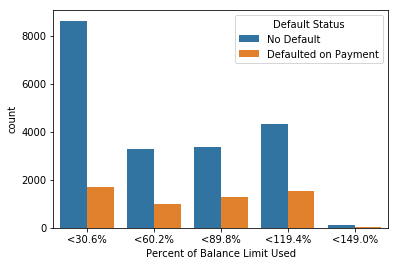

In [57]:
plt.clf()
sns.countplot(percent_limit_bins,  hue = df11['default_last_month'])
plt.xticks(ticks = np.arange(5), labels = ['<30.6%', '<60.2%','<89.8%', '<119.4%', '<149.0%'] )
plt.xlabel('Percent of Balance Limit Used')
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])
fig.savefig('Percentage_Limits.png')
plt.show

In [54]:

limit_bins = pd.cut(df11['LIMIT_BAL'], bins = 5)
limit_bins.unique()

[(9010.0, 208000.0], (406000.0, 604000.0], (208000.0, 406000.0], (604000.0, 802000.0], (802000.0, 1000000.0]]
Categories (5, interval[float64]): [(9010.0, 208000.0] < (208000.0, 406000.0] < (406000.0, 604000.0] < (604000.0, 802000.0] < (802000.0, 1000000.0]]

In [53]:
df11.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PERCENT_LIMIT', 'PERCENT_PAY',
       'ever_default', 'Limit_history', 'Total_PAY_AMT', 'total_months_behind',
       'Total_Bill_AMT', 'aggregate_default', 'aggregate_default_simple',
       'default_last_month', 'percent_limit_bins'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

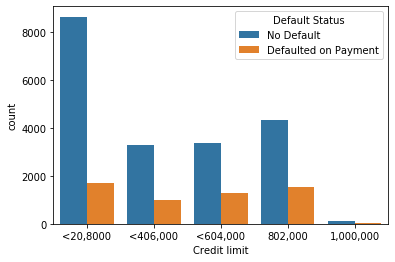

In [57]:
plt.clf()
sns.countplot(percent_limit_bins,  hue = df11['default_last_month'])
plt.xticks(ticks = np.arange(5), labels = ['<20,8000', '<406,000', '<604,000','802,000', '1,000,000' ])
plt.xlabel('Credit limit')
plt.legend(title = 'Default Status', labels = ['No Default', 'Defaulted on Payment'])
fig.savefig('Balance_Limits.png')
plt.show

Above was the initial out of the box performance from scikit-learn's Random Forest Model. There results were quite good as you can see from the accuracy score, confusion matrix, and classification report. However in later cells I will us the predict_proba method to see how in some situations using the predict_proba method while decreasing accuracy, may give more useful outcome. This is because some predictions may be more valuable than others. Predicting one default may be more valuable than incorrectly predicting a payment. To actually make the decision on how much more important one prediction is than another the data set would need to include information on profit from not defaulting and loss on defaults. 


In [43]:
threshold = 0.3
y_pred_by_proba_30 = (y_proba[:,1] >= threshold).astype('int')
print(y_pred_by_proba_30)
acc = accuracy_score(y_test, y_pred_by_proba_30)
print(acc)
print(confusion_matrix(y_test, y_pred_by_proba_30))
print(classification_report(y_test, y_pred_by_proba_30))

[0 0 0 ... 0 0 0]
0.8031666666666667
[[4074  573]
 [ 608  745]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4647
           1       0.57      0.55      0.56      1353

    accuracy                           0.80      6000
   macro avg       0.72      0.71      0.72      6000
weighted avg       0.80      0.80      0.80      6000



In the above code, I change the threshold for being classified as likely to default so that all individuals with a probability of defaulting above .3 are predicted to default. 

In [59]:
print(X_test.shape)
y_pred_by_proba_30.shape

(6000, 32)


(6000,)

In [ ]:
threshold = 0.2
y_pred_by_proba_20 = (y_proba[:,1] >= threshold).astype('int')
print(y_pred_by_proba)
acc = accuracy_score(y_test, y_pred_by_proba)
print(acc)
print(confusion_matrix(y_test, y_pred_by_proba))
print(classification_report(y_test, y_pred_by_proba))

In [ ]:
y_predict_by_proba_30

In the 2 cells above, I chose to decrease the threshold used to label a customer as a default risk. By doing this we are increasing the amount of actual defaults we will predict. This means we will also predict more non-defaults as defaults than normal. However we will also be predicting more real defaults. In fact by decreasing the Random Forest predictproba threshod to .3 we predict a majority of the defaults (55%) in the coming month.  Even though there are more non defaults predicted as defaults than the 50% threshold, only 14% of non- defaulters are being predicted to default after the change to a 30% threshold. 
    If we go even further and put the threshold at .2 we now predict over 68% of defaults. However we are now predicting 32% of non defaults as defaults. Decreasing the threshold for what is considered a default is risk below 50% is likely reasonable when it comes to risk managment. To decide just where to set the limit one would need to know the typical profit of non-defaults vs. the typical loss of defaults to determine where the company can get maximum profits.
    If we had more information it would be quite interesting to 

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
C_score = cross_val_score(RFreg, X, y, cv = 5)
print(C_score)


[0.80836527 0.81133333 0.82433333 0.8335     0.8258043 ]


Average Random Forest Classifier Score with cross_val_score: .82067


# 5 fold cross validation score
Above you can see that by using a five fold cross validation we get an average random forest classifier score of .8206 that is essentially identical to the the accuracy score we got while predicting for the single test sample earlier. Supporting the notion that our earlier test was in now way irregular. 

In [28]:
adb_clf = AdaBoostClassifier(base_estimator = dtboost, n_estimators = 1000, learning_rate = .009)
adb_clf.fit(X_train, y_train)
y_adb_pred = adb_clf.predict(X_test)
acc = accuracy_score(y_test, y_adb_pred)
print(acc)
print(confusion_matrix(y_test, y_adb_pred))
print(classification_report(y_test, y_adb_pred))


0.8243333333333334
[[4514  171]
 [ 883  432]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4685
           1       0.72      0.33      0.45      1315

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.78      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



Looking at the performance of the gradient boosters  vs. Random Forest:
We see that as straight out of the box models, Random Forest performs better in terms of accuracy. We can see that recall is 5% higher than Adaboost, and 2% higher than Gradient boost.  Although Adaboost and Gradientboost have a precision that is one to two percent higher than Random Forest such a small increase in false positives is less valuable than the increased percentage of default that is predicted. Additionaly of the two choices of adaboost and Gradientboost, Gradient boost is clearly the better of the two.

Random Forest:
precision    recall  f1-score   support

           0       0.85      0.94      0.89      4731
           1       0.64      0.38      0.47      1269
Adaboost - 
                precision    recall  f1-score   support

           0       0.84      0.95      0.90      4746
           1       0.65      0.33      0.44      1254
Gradientboost 
                precision    recall  f1-score   support

           0       0.85      0.95      0.90      4731
           1       0.66      0.36      0.46      1269

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_Grid = GradientBoostingClassifier()

import numpy as np
n_estimators = [500, 1000]
max_features = [.1, .15,.2]
learning_rate = [.01, .02, .05]
max_depth = [3, 6, 9]
parameters = {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth' : max_depth, 'learning_rate': learning_rate }

clf2 = GridSearchCV(GBC_Grid, param_grid = parameters, cv=5)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500, 1000], 'max_features': [0.1, 0.15, 0.2], 'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.02, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print(clf2.best_params_)
b_estimator = clf2.best_estimator_
print(b_estimator)

{'learning_rate': 0.02, 'max_depth': 3, 'max_features': 0.15, 'n_estimators': 500}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=3,
              max_features=0.15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.02, subsample = .6, max_features = .15,  n_estimators=500)
GBC.fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)
GBC_acc = accuracy_score(y_test, GBC_pred)
print(GBC_acc)
print(confusion_matrix(y_test, GBC_pred))
print(classification_report(y_test, GBC_pred))


0.8183333333333334
[[4443  204]
 [ 886  467]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4647
           1       0.70      0.35      0.46      1353

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000



In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
BC_CV = GradientBoostingClassifier(learning_rate=0.02, subsample = .6, max_features = .15,  n_estimators=500)
C_score = cross_val_score(BC_CV, X, y, cv = 5)
print(C_score)


[0.80853191 0.81233333 0.824      0.8345     0.82830472]


Average Cross Validation Score for hyperparameterized Gradient Boost Classifier: .8215

In [48]:
print(gb_prob)

[[0.94926001 0.05073999]
 [0.8872298  0.1127702 ]
 [0.90296792 0.09703208]
 ...
 [0.89742609 0.10257391]
 [0.92959493 0.07040507]
 [0.84963941 0.15036059]]


In [51]:
threshold2 = .3
y_gb_proba = (gb_prob[:,1]>= threshold2).astype('int')
print(y_gb_proba)
print(accuracy_score(y_test, y_gb_proba))
print(confusion_matrix(y_test, y_gb_proba))
print(classification_report(y_test, y_gb_proba))

[0 0 0 ... 0 0 0]
0.8036666666666666
[[4080  567]
 [ 611  742]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4647
           1       0.57      0.55      0.56      1353

    accuracy                           0.80      6000
   macro avg       0.72      0.71      0.72      6000
weighted avg       0.80      0.80      0.80      6000



The Gradient Boost Classifier performs very similary to RandomForestClassifier. While gradient boost's original confusion matrix was essentially identical to Random Forest. When using a threshold of .30 the recall of both models was .55 of the gradient boost classifier was .57 essentially while predicting actual defaults at the same rate, our gradientboosting algorithm was predicting less false positive (less non-defaults were predicted as defaults. This indicates our Gradient boosting classifier performed slightly better. 